# Assignment 2 - Machine Learning Basics

## *Vivek Sahukar*
Netid:  *vs165*

Github link: *Link to the github repo with your completed assignment*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**1.1**

Performance of a flexible statistical learning method would be better than an inflexible method. The flexible method has higher variance and would be a better fit for the data.

**1.2**

Performance of a flexible statistical learning method would be worse than an inflexible method. Since the number of obervations (n) is much smaller than number of predictors (p), the flexible model would have higher variance and would be overfitting the data.

**1.3**

Performance of a flexible statistical learning method would be better than an inflexible method. The flexible method would be a better fit to the data. The inflexible method would have higher bias and would result in underfitting the data.

**1.4**

Performance of a flexible statistical learning method would be worse than an inflexible method. The flexible method has higher variance than inflexible method. Due to higher variance, even a small amount of noise will affect the flexible model. The flexible model would be more susceptible to the random irreducible error and therefore would perform badly than the inflexible method.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**2 (a)**

**(i)** It is a regression problem as the outcome variable, CEO salary is continous.

**(ii)** We are interested in inference. We are trying to understand which factors affect CEO salary, not how much each of those factors affect CEO salary.

**(iii)** Sample size, n = 500; Number of predictors, p = 3

**2 (b)**

**(i)** This is a classification problem. The outcome variable has 2 values: success or failure.

**(ii)** We are interested in prediction since we are trying to predict the success or failure of the product from historical data on similar products.

**(iii)** Sample size, n = 20; Number of predictors, p = 13

**2 (c)**

**(i)** This is a regression problem. The continuous outcome variable is % change in US dollar and the predictors are % change in US, British, and German market.

**(ii)** We are interested in prediction. We want to predict the % change in US dollar from given predictors.

**(iii)** Sample size, n = 52; Number of predictors, p = 3

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

**3 (a)**

In [62]:
# (a) Write your own kNN classifier
import numpy as np
import pandas as pd

class Knn:
    """self-defined k-Nearest Neighbor class object for 
    classification tasks"""
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x.values
        self.y = y.values
        
        
    def predict(self, x, k):
        y_pred = [] 
# Variable to store the estimated class label
# Calculate the distance from each vector in x to the training data
        for row in x.values:
            label = self.nearest_distance(row, k)
            y_pred.append(label)
        # Return the predicted value of targets
        return y_pred
    
    def nearest_distance(self, r, k):
        label =[]
        distance = [self.euc_distance(r, row) for row in self.x]  
        best_distance = sorted(distance)
        best_distance = best_distance[:k]
        for i in best_distance:
            index = distance.index(i)
            y = self.y[index][0]
            label.append(y)
        return max(label, key= label.count)
        
        
    def euc_distance(self, a,b):
        return np.linalg.norm(a-b)
        

# Metric of overall classification accuracy
# (a more general function, sklearn.metrics.accuracy_score, 
# is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**3 (b)**

In [63]:
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import time

train_low = pd.read_csv('Data/A2_X_train_low.csv',  header=None)
y_train_low = pd.read_csv('Data/A2_y_train_low.csv',  header=None)
test_low = pd.read_csv('Data/A2_X_test_low.csv',  header=None)
y_test_low = pd.read_csv('Data/A2_y_test_low.csv',  header=None)

train_high = pd.read_csv('Data/A2_X_train_high.csv',  header=None)
y_train_high = pd.read_csv('Data/A2_y_train_high.csv',  header=None)
test_high = pd.read_csv('Data/A2_X_test_high.csv',  header=None)
y_test_high = pd.read_csv('Data/A2_y_train_high.csv',  header=None)

**3 (c)**

In [68]:
knn = Knn()
s1_k1 = time.time()
fit = knn.fit(train_low, y_train_low)
result = knn.predict(test_low, 5)
e1_k1 = time.time()
self_score_k1 = metrics.accuracy_score(y_test_low, result)
print(f"Self_written KNN accuracy: {round(self_score_k1, 3)} and the computation time was: {round(e1_k1-s1_k1, 3)} s")

sknn = KNeighborsClassifier(n_neighbors=5)
s2_k1 = time.time()
sknn.fit(train_low,y_train_low.values.ravel())
result_2 = sknn.predict(test_low)
e2_k1 = time.time()
skit_score_k1 = metrics.accuracy_score(y_test_low, result_2)
print(f"Scikit_learn KNN accuracy: {round(skit_score_k1, 3)} and the computation time was: {round(e2_k1-s2_k1, 3)} s")

Self_written KNN accuracy: 0.925 and the computation time was: 8.114 s
Scikit_learn KNN accuracy: 0.925 and the computation time was: 0.004 s


In [70]:
knn = Knn()
s1_k5 = time.time()
fit_2 = knn.fit(train_high, y_train_high)
result_2 = knn.predict(test_high, 5)
e1_k5 = time.time()
self_score_k5 = metrics.accuracy_score(y_test_high, result_2)
print(f"Self_written KNN accuracy: {round(self_score_k5, 3)} and the computation time was: {round(e1_k5-s1_k5, 3)} s")

sknn = KNeighborsClassifier(n_neighbors=5)
s2_k5 = time.time()
sknn.fit(train_high,y_train_high.values.ravel())
result_2 = sknn.predict(test_high)
e2_k5 = time.time()
skit_score_k5 = metrics.accuracy_score(y_test_high, result_2)
print(f"Scikit_learn KNN accuracy: {round(skit_score_k5, 3)} and the computation time was: {round(e2_k5-s2_k5, 3)} s")

Self_written KNN accuracy: 0.993 and the computation time was: 9.245 s
Scikit_learn KNN accuracy: 0.993 and the computation time was: 0.175 s


**3 (d)**

There is no difference in accuracy when I use either self-written knn or scikit_learn knn. However, scikit_learn knn is far efficient in implementation and therefore performs same task in very less time compared to the time taken by my self-written model to finish same task.

**3 (e)**

If the prediction process are slow then we need more time and computational resources to train our models. This caused delay in key decision process and has negative consequences. Moreover, if the prediction proces is slow, the existing models can not be trained quickly on new type of data set to make the prediction better.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [71]:
import numpy as np
import pandas as pd 

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

**4 (a)**

In [72]:
x_test = np.array([0, 0, 0])

euclidean_distance = [round(np.linalg.norm(x_test - x),4) for x in X]

obs = [1, 2, 3, 4, 5, 6]
distance_table = pd.DataFrame(euclidean_distance, columns = 
['Euclidean Distance between each observation and test point'], index = obs)
distance_table

,Euclidean Distance between each observation and test point
1,3.0000
2,2.0000
3,3.1623
4,2.2361
5,1.4142
6,1.7321


**4 (b)**

In [73]:
k = 1
best_distance = sorted(euclidean_distance)[:k]
pred = []

for d in best_distance:
    idx = euclidean_distance.index(d)
    pred.append(y[idx])
    
prediction = max(pred, key = pred.count)
print('The prediction for k = 1 is "{}"'.format(prediction))

The prediction for k = 1 is "b"


**4 (c)**

In [74]:
k = 3
best_distance = sorted(euclidean_distance)[:k]
pred = []

for d in best_distance:
    idx = euclidean_distance.index(d)
    pred.append(y[idx])
    
prediction = max(pred, key=pred.count)
print('The prediction for k = 3 is "{}"'.format(prediction))

The prediction for k = 3 is "r"


**4 (d)**

If the Bayes decision boundary is non-linear, then the best value of k would be small. Smaller values of k lead to higher variance and the model would be able to capture the non-linear complex relationships along the boundary.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**5(a)**

In [75]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples = 1000, noise = 0.35)
print('The sample values of predictor variable in training data are : \n{}\n'
      .format(X))
print('The sample values of outcome variable in training data are : \n{}'
      .format(y[:5]))

The sample values of predictor variable in training data are : 
[[ 2.75227524  0.18377261]
 [ 1.34637792 -0.46418242]
 [-0.13285465  1.45371855]
 ...
 [-1.40579394  0.56632299]
 [-0.66395197  0.51039524]
 [-0.34501324  1.12503265]]

The sample values of outcome variable in training data are : 
[1 1 0 0 1]


**5(b) Scatter plot of random samples**

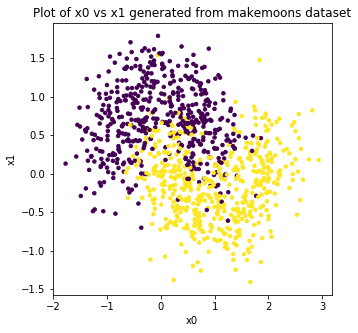

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=y, s=12)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Plot of x0 vs x1 generated from makemoons dataset')
plt.show()

**5(c) Create 3 different data subsets and fit knn classifier with k = {1,25,50)**

In [77]:
def f():
    rand_int = np.random.randint(0, 999, 100)
    X_sample = X[rand_int]
    y_sample = y[rand_int]
    return X_sample, y_sample

X1, y1 = f()
X2, y2 = f()
X3, y3 = f()


knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_1 = knn1.fit(X1, y1)
knn1_2 = knn1.fit(X2, y2)
knn1_3 = knn1.fit(X3, y3)

knn25 = KNeighborsClassifier(n_neighbors=25)
knn25_1 = knn25.fit(X1, y1)
knn25_2 = knn25.fit(X2, y2)
knn25_3 = knn25.fit(X3, y3)

knn50 = KNeighborsClassifier(n_neighbors=50)
knn50_1 = knn50.fit(X1, y1)
knn50_2 = knn50.fit(X2, y2)
knn50_3 = knn50.fit(X3, y3)

**5(d) Plot the decision boundary**

<Figure size 1080x1080 with 0 Axes>

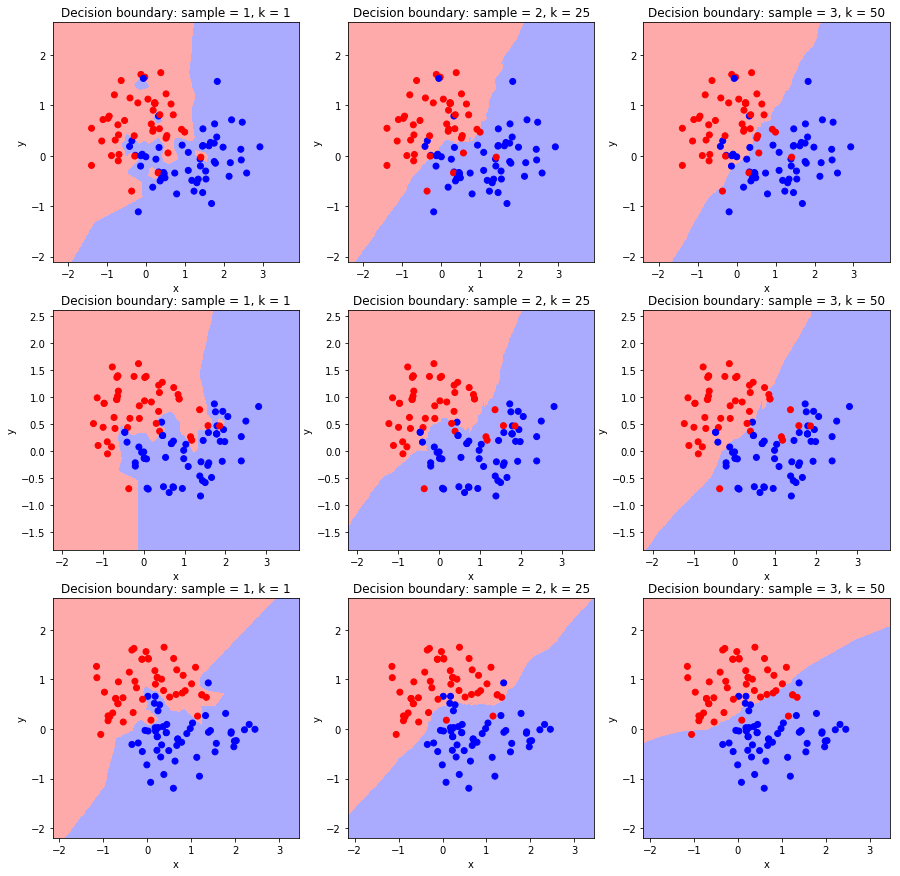

In [78]:
"""
# function for graphing decision boundary: 
source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
#sphx-glr-auto-examples-neighbors-plot-classification-py
"""
def graphDecisionBoundary(X, y, knn, k, s):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_dark = ListedColormap(['#FF0000', '#0000FF'])
    h = 0.02
    
    xx,yy = np.meshgrid(np.arange(-2,3),np.arange(-2,2))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))

    # put result into color plot    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    
    #plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # plot training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_dark)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision boundary: sample = {}, k = {}'.format(s, k))
    #plt.show()

from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
plt.figure()
plt.subplots(3,3)

plt.subplot(331)
knn1.fit(X1, y1)
graphDecisionBoundary(X1, y1, knn1, 1, 1)

plt.subplot(332)
knn25.fit(X1, y1)
graphDecisionBoundary(X1, y1, knn25, 25, 2)

plt.subplot(333)
knn50.fit(X1, y1)
graphDecisionBoundary(X1, y1, knn50, 50, 3)

plt.subplot(334)
knn1.fit(X2, y2)
graphDecisionBoundary(X2, y2, knn1, 1, 1)

plt.subplot(335)
knn25.fit(X2, y2)
graphDecisionBoundary(X2, y2, knn25, 25, 2)

plt.subplot(336)
knn50.fit(X2, y2)
graphDecisionBoundary(X2, y2, knn50, 50, 3)

plt.subplot(337)
knn1.fit(X3, y3)
graphDecisionBoundary(X3, y3, knn1, 1, 1)

plt.subplot(338)
knn25.fit(X3, y3)
graphDecisionBoundary(X3, y3, knn25, 25, 2)

plt.subplot(339)
knn50.fit(X3, y3)
graphDecisionBoundary(X3, y3, knn50, 50, 3)

plt.show()

**5 (e)**

Decision boundary for k = 1 appear to best separate the two classes of data. 
Decision boundary for k = 1 vary the most as the data changes.
However, kNN classifier with k = 25 is the best classifier among all the 3 classifiers. It represents the perfect balance for the bias-variance tradeoff.
Decision boundary for k = 50 vary very less with the change in the sample data.

**5 (f)**

As the k increases in the model, the bias increases and the variance decreases which results in an underfit to data. The boundary becomes more linear and classification accuracy decreases. The decision boundary does not appear to follow optimal decision boundary. The model is not able to explain complex patterns in the data. 

As the k decreases in the model (k = 1), the variability increases and the bias decreases resulting in an overfit to the data. The model can explain the complexities in the data and can classify more accurately. However, if we overfit model to the training data, it will perform poorly with real world test data. The reason is test data is completely different. Since there is high variance the model, the model will fit to the random noise in data.

There we have to always decide on bias-variance tradeoff when selecting the model to fit our training data. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**6 (a) Generate test and train random samples from make_moons** 

In [79]:
# 6(a)
import random
random.seed(123)
X_train, y_train = X, y
X_test, y_test = make_moons(n_samples=1000, noise=0.35)

**6 (b) Train kNN classifier on train set and then apply to test set for k = {1, 2, ... 500}**

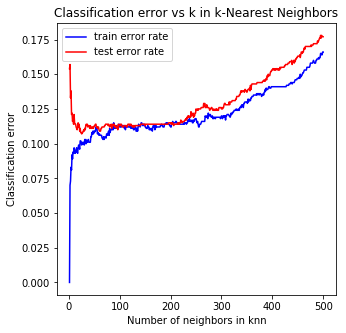

In [80]:
neighbors = list(range(1, 501))
test_error_rate = []
train_error_rate = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_error_rate.append(1 - accuracy_score(y_train, y_pred_train))
    test_error_rate.append(1 - accuracy_score(y_test, y_pred_test))

plt.figure(figsize=(5,5))
plt.plot(neighbors, train_error_rate, 
         label='train error rate', color='b')
plt.plot(neighbors, test_error_rate, 
         label='test error rate', color='r')
plt.xlabel('Number of neighbors in knn')
plt.ylabel('Classification error')
plt.title('Classification error vs k in k-Nearest Neighbors')
plt.legend()
plt.show()

**6 (c) Trend in the results**

As k increases, the training error rises sharply and the test error decreases sharply. At about k = 7 both the graphs intersect and after that train error increases and test error increases too. For about k = 7, both the graphs have lowest error rate. The graphs intersect again before k = 200, and both train and test error increase till k = 500.

**6 (d) Values of k for high bias and high variance**

In [81]:
k_min_train_error = neighbors[train_error_rate.index(min(train_error_rate))]
k_min_test_error = neighbors[test_error_rate.index(min(test_error_rate))]
k_max_train_error = neighbors[train_error_rate.index(max(train_error_rate))]
k_max_test_error = neighbors[test_error_rate.index(max(test_error_rate))]

print('Minimum train error is for k = {} (Low bias and high variance)'
      .format(k_min_train_error))
print('Minimum test error is for k = {} '.format(k_min_test_error))
print('Maximum train error is for k = {} (High bias and low variance)'
      .format(k_max_train_error))
print('Maximum test error is for k = {} '.format(k_min_test_error))


Minimum train error is for k = 1 (Low bias and high variance)
Minimum test error is for k = 25 
Maximum train error is for k = 499 (High bias and low variance)
Maximum test error is for k = 25 


**6 (e) Optimal value of k**

In [94]:
# code for finding optimal value of k
both = set(train_error_rate).intersection(test_error_rate)
indices_train_error_rate = [train_error_rate.index(x) for x in both]
indices_test_error_rate = [test_error_rate.index(x) for x in both]
i = min(both)
test_error_rate.index(i)
test_error_rate[25]
train_error_rate[25]


0.09899999999999998

As we can see from above plots and k values, for k = 25, test error is minimum. Though for k = 1, training error is minimum but this is the model with highest variability and it will perform poorly with test data. This is evident from the graph also that for k = 1, the training error is very high. 

For k = 25, both train and test error are about 10 to 12%. So, I would choose k in optimal range of (20, 90) depending on bias variance tradeoff I want in my model.

**6 (f) What controls flexibility in other models**

Training parameters control the flexibility in other models.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [83]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,
           6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,
           9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,
           1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,
           2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,
           8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64
           ,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,
           61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,
           4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

**7(a)** Scatter plot of training data

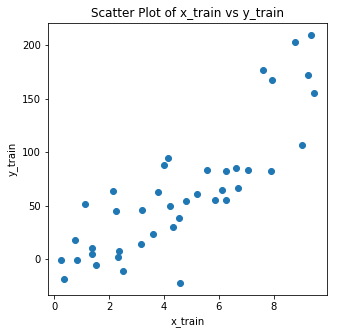

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,
           6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,
           4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,
           1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,
           9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,
           8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,
           94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,
           65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,
           1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

# convert given lists to numpy arrays

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

plt.figure(figsize=(5,5))
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Scatter Plot of x_train vs y_train')
plt.show()

**7(b)** Fit a linear regression model to training dataset

In [98]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

reg = linear_model.LinearRegression().fit(x_train, y_train)

# get the model coefficient and intercept and R-squared
r2_train = reg.score(x_train, y_train)
x0 = reg.intercept_[0]
x1 = reg.coef_[0][0]

y_train_pred = reg.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
print('R-squared value for the model fitted to training dataset is {}'
      .format(round(r2_train, 3)))
print('The mean squared error for the model is {}'
      .format(round(mse,3)))
print('The linear regression model intercept is {}'
      .format(round(x0, 3)))
print('The linear regression model slope is {}'.format(round(x1, 3)))

R-squared value for the model fitted to training dataset is 0.701
The mean squared error for the model is 1052.585
The linear regression model intercept is -21.731
The linear regression model slope is 18.303


**The linear regression model after transformations on training data variables is:**

$y$ = -21.731 + 18.303$x$

**7(c) Linear model after transformations on training data**

In [86]:
x_train_sq = np.square(x_train)
x_train_new = np.concatenate((x_train, x_train_sq), axis=1)

# fit new regression model after transformation
reg1 = linear_model.LinearRegression().fit(x_train_new, y_train)

x0_new = reg1.intercept_[0]
x1_new = reg1.coef_[0][0]
x2_new = reg1.coef_[0][1]

y_train_pred_new = reg1.predict(x_train_new)
r2_train_new = reg1.score(x_train_new, y_train)
mse_train_new = mean_squared_error(y_train, y_train_pred_new)

# tried with log and reciprocal transformations: x-squared is the 
# best transformation giving highest R-squared.
log_x = np.log(x_train)
reciprocal_x = np.reciprocal(x_train)

print('R-squared value for the new model fitted to training dataset is {}'
      .format(round(r2_train_new, 3)))
print('The mean squared error for the new model is {}'
      .format(round(mse_train_new,3)))
print('The intercept for new linear regression model is {}'
      .format(round(x0_new, 3)))
print('The coefficient for x in new linear regression model is {}'
      .format(round(x1_new, 3)))
print('The coefficient for x-squared in new linear regression model is {}'
      .format(round(x2_new, 3)))


R-squared value for the new model fitted to training dataset is 0.749
The mean squared error for the new model is 884.798
The intercept for new linear regression model is 8.007
The coefficient for x in new linear regression model is 0.471
The coefficient for x-squared in new linear regression model is 1.832


**The linear regression model after transformations on training data variables is:**

$y$ = 8.007 + 0.471$x$ + 1.832$x^2$

**7(d)** Plot of original training data and 2 models fitted to the data

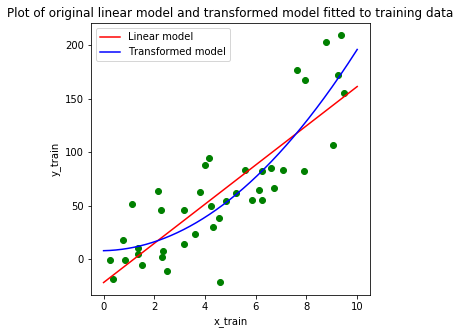

In [87]:
# 7(d) plotting old and new regression models with training data
x = np.linspace(0, 10, 1000)
plt.figure(figsize=(5,5))
plt.scatter(x_train, y_train, color='g')
plt.plot(x, x0 + x1*x, label='Linear model', color='r')
plt.plot(x, x0_new + x1_new*x + x2_new*x**2, 
         label='Transformed model', color='b')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Plot of original linear model and transformed model fitted to training data')
plt.legend()
plt.show()

**7(e)** Applying both the above models to test data

In [88]:
# 7(e) apply models to test data
y_test_pred = reg.predict(x_test)

# Get R-squared and mean-squared error after fitting simple model to test dataset
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = reg.score(x_test, y_test)
print('R-squared value for the original model fitted to test data is {}'
      .format(round(r2_test, 3)))
print('The mean squared error for the original model fitted to test data is {}'
      .format(round(mse_test,3)))

# Since we used x-squared, so transforming test data set in that format
x_test_sq = np.square(x_test)
x_test_new = np.concatenate((x_test, x_test_sq), axis=1)

# apply new model to test data
y_test_pred_new = reg1.predict(x_test_new)

# Get R-squared and mean-squared error after fitting transformed model to test dataset
mse_test_new = mean_squared_error(y_test, y_test_pred_new)
r2_test_new = reg1.score(x_test_new, y_test)
print('R-squared value for the new model fitted to test data is {}'
      .format(round(r2_test_new, 3)))
print('The mean squared error for the new model fitted to test data is {}'
      .format(round(mse_test_new,3)))

R-squared value for the original model fitted to test data is 0.556
The mean squared error for the original model fitted to test data is 2023.312
R-squared value for the new model fitted to test data is 0.693
The mean squared error for the new model fitted to test data is 1398.882


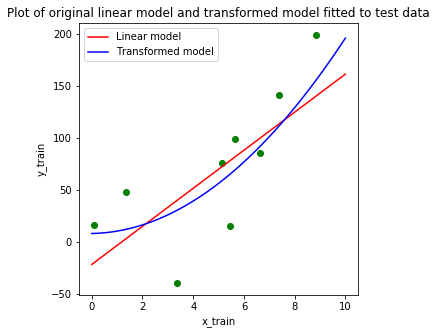

In [89]:
# 7(d) plotting old and new regression models with test data
x = np.linspace(0, 10, 1000)
plt.figure(figsize=(5,5))
plt.scatter(x_test, y_test, color='g')
plt.plot(x, x0 + x1*x, label='Linear model', color='r')
plt.plot(x, x0_new + x1_new*x + x2_new*x**2, label='Transformed model', color='b')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Plot of original linear model and transformed model fitted to test data')
plt.legend()
plt.show()

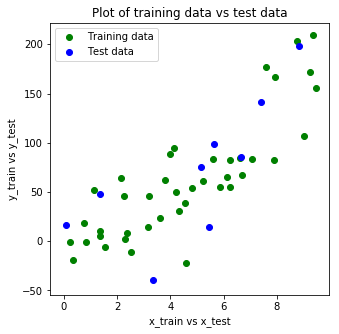

In [90]:
plt.figure(figsize=(5,5))
plt.scatter(x_train, y_train, color='g', label='Training data')
plt.scatter(x_test, y_test, color='b', label='Test data')
plt.xlabel('x_train vs x_test')
plt.ylabel('y_train vs y_test')
plt.title('Plot of training data vs test data')
plt.legend()
plt.show()

**7(f)** 
The transformed model (which include x-squared transformed variable) performs better than the original linear model for both training and test data. For test data, R-squared value is higher in transformed model (0.693) compared to R-squared value in original model (0.556). For training data, R-squared value is higher in transformed model (0.749) compared to R-squared value in original model (0.741). Mean-squared error for transformed model (1398.882) is lower than for original model (2023.312). If we see the above plot of original linear model and transformed model fitted to test data, we can see that the test data scatter plot is similar to training data scatter plot. Therefore our transformed model performs better than the simple linear model on both training and test datasets.

**7(g)** If the test data is significantly different from training dataset then the trained model would perform poorly and the predictive capability of the model would reduce significantly. The reason is that our training model has not been trained on new kind of data and therefore would perform poorly on predictions on vastly different test data. 